## EDA

In [ ]:
import pandas as pd 

df = pd.read_csv("final_movie_table.csv")

In [4]:
df.head()

,movie_id,movie_name,budget,genres,original_language,original_title,release_date,release_year,revenue,runtime,status,adult,vote_average,vote_count,lead_actor,keyword_count,user_avg_rating,user_rating_count
0,862,Toy Story,30000000,Animation|Comedy|Family,en,Toy Story,1995-10-30,1995.0,373554033.0,81.0,Released,False,7.7,5415.0,Tom Hanks,9.0,3.888157,66008.0
1,8844,Jumanji,65000000,Adventure|Fantasy|Family,en,Jumanji,1995-12-15,1995.0,262797249.0,104.0,Released,False,6.9,2413.0,Robin Williams,6.0,3.236953,26060.0
2,15602,Grumpier Old Men,0,Romance|Comedy,en,Grumpier Old Men,1995-12-22,1995.0,0.0,101.0,Released,False,6.5,92.0,Walter Matthau,4.0,3.175550,15497.0
3,31357,Waiting to Exhale,16000000,Comedy|Drama|Romance,en,Waiting to Exhale,1995-12-22,1995.0,81452156.0,127.0,Released,False,6.1,34.0,Whitney Houston,5.0,2.875713,2981.0
4,11862,Father of the Bride Part II,0,Comedy,en,Father of the Bride Part II,1995-02-10,1995.0,76578911.0,106.0,Released,False,5.7,173.0,Steve Martin,9.0,3.079565,15258.0


In [6]:
df.info()
df.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46629 entries, 0 to 46628
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   movie_id           46629 non-null  int64  
 1   movie_name         46625 non-null  object 
 2   budget             46629 non-null  int64  
 3   genres             44104 non-null  object 
 4   original_language  46618 non-null  object 
 5   original_title     46629 non-null  object 
 6   release_date       46541 non-null  object 
 7   release_year       46541 non-null  float64
 8   revenue            46625 non-null  float64
 9   runtime            46361 non-null  float64
 10  status             46543 non-null  object 
 11  adult              46629 non-null  bool   
 12  vote_average       46625 non-null  float64
 13  vote_count         46625 non-null  float64
 14  lead_actor         44137 non-null  object 
 15  keyword_count      46628 non-null  float64
 16  user_avg_rating    458

movie_id                0
movie_name              4
budget                  0
genres               2525
original_language      11
original_title          0
release_date           88
release_year           88
revenue                 4
runtime               268
status                 86
adult                   0
vote_average            4
vote_count              4
lead_actor           2492
keyword_count           1
user_avg_rating       745
user_rating_count     745
dtype: int64

In [7]:
# Split the genre strings and count each genre
genre_counts = (
    df['genres']
    .str.split('|')
    .explode()
    .value_counts()
    .reset_index()
)

genre_counts.columns = ['genre', 'count']
genre_counts

,genre,count
0,Drama,20809
1,Comedy,13467
2,Thriller,7794
3,Romance,6923
4,Action,6730
5,Horror,4762
6,Crime,4387
7,Documentary,4050
8,Adventure,3587
9,Science Fiction,3140


In [11]:
genre_vote_avg = (
    df_genre
    .groupby('genre')['vote_average']
    .mean()
    .sort_values(ascending=False)
    .reset_index()
)

genre_vote_avg

,genre,vote_average
0,Animation,6.271407
1,History,6.157814
2,War,6.036573
3,Drama,5.892609
4,Music,5.878528
5,Crime,5.875427
6,Mystery,5.824085
7,Documentary,5.811136
8,Romance,5.791492
9,Fantasy,5.762348


ValueError: cannot reindex on an axis with duplicate labels

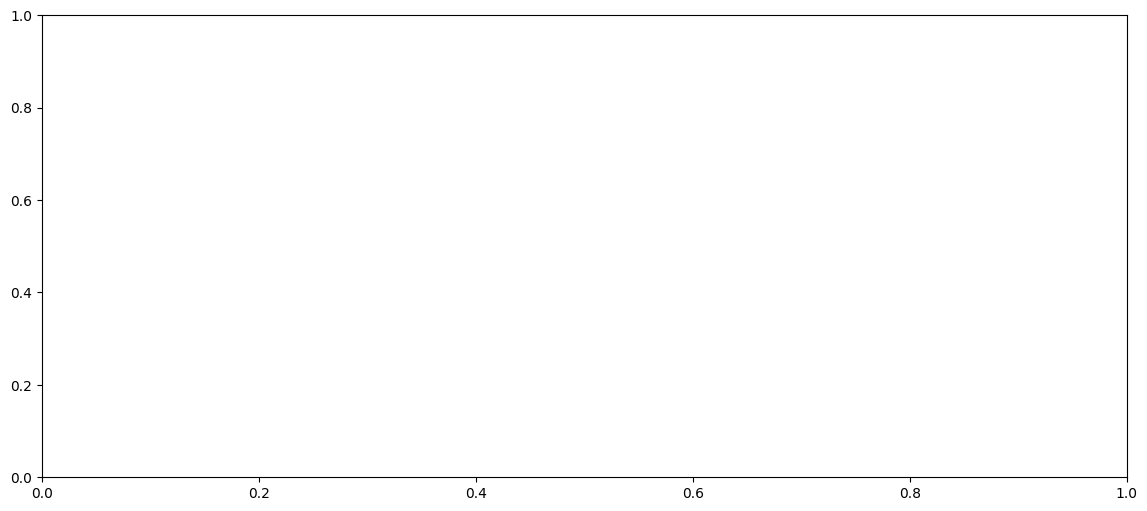

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

df_genre = (
    df.assign(genre=df['genres'].str.split('|'))
      .explode('genre')
)

plt.figure(figsize=(14,6))
sns.boxplot(data=df_genre, x='genre', y='vote_average')
plt.xticks(rotation=90)
plt.title('Vote Average by Genre')
plt.tight_layout()
plt.show()